# Investigate Results
----
Load in `results` files and...
1. Take a peek at raw **test ROC results**
2. Generate **bar plots** of each link prediction method given an inputted network, visibility value (pct. hidden edges), and metric (e.g. test ROC), along with some pre-calculated network statistics (e.g. num. nodes, avg. clustering coefficient, etc.)
3. Plot **ROC curves** for inputted network, visibility, and link prediction method

## 1. Investigate ROC Results

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import link_prediction_scores as lp
import pickle

RANDOM_SEED = 0

In [64]:
fb_results = None
with open('./results/fb-experiment-3-results.pkl', 'rb') as f:
    fb_results = pickle.load(f)

In [69]:
roc = {}
for experiment_name, method_dict in fb_results.iteritems():
    for method, results in method_dict.iteritems():
        experiment_method = experiment_name + '-' + method
        roc[experiment_method] = results['test_roc']

In [70]:
roc

{'fb-0-0.25-hidden-aa': 0.94809308795322789,
 'fb-0-0.25-hidden-gae': 0.8908721426203946,
 'fb-0-0.25-hidden-jc': 0.80814057737134659,
 'fb-0-0.25-hidden-n2v_dot_prod': 0.81150939192897242,
 'fb-0-0.25-hidden-n2v_edge_emb': 0.91215001005210805,
 'fb-0-0.25-hidden-pa': 0.87182747322607468,
 'fb-0-0.25-hidden-sc': 0.84677870691856716,
 'fb-0-0.5-hidden-aa': 0.89122115317257988,
 'fb-0-0.5-hidden-gae': 0.87930170651998452,
 'fb-0-0.5-hidden-jc': 0.76956612117723378,
 'fb-0-0.5-hidden-n2v_dot_prod': 0.77747853524970378,
 'fb-0-0.5-hidden-n2v_edge_emb': 0.89029982121591444,
 'fb-0-0.5-hidden-pa': 0.8410207444362211,
 'fb-0-0.5-hidden-sc': 0.85001172604308484,
 'fb-0-0.75-hidden-aa': 0.69853800528634769,
 'fb-0-0.75-hidden-gae': 0.8074368251455708,
 'fb-0-0.75-hidden-jc': 0.65428835053723,
 'fb-0-0.75-hidden-n2v_dot_prod': 0.68109375018026885,
 'fb-0-0.75-hidden-n2v_edge_emb': 0.82521796665978286,
 'fb-0-0.75-hidden-pa': 0.81283695851566917,
 'fb-0-0.75-hidden-sc': 0.80727847699654232,
 'fb-

## 2. Generate Bar Plots with Network Statistics

In [134]:
# Generate bar plot given graph name (which ego network), frac_hidden, and metric to investigate (e.g. test ROC)
def bar_plot(graph_name, frac_hidden, metric):
    results_dict = fb_results['fb-{}-{}-hidden'.format(graph_name, frac_hidden)]
    metric_dict = {}
    for method, results_dict in results_dict.iteritems():
        metric_dict[method] = results_dict[metric]
        
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(metric_dict)), metric_dict.values())
    plt.xticks(range(len(metric_dict)), list(metric_dict.keys()))
    plt.grid(linestyle='dashed')
    plt.xlabel("Link prediction methods")
    plt.ylabel("Metric: {}".format(metric))
    plt.title("Link Prediction Results: FB {} graph, {} hidden".format(graph_name, frac_hidden))
    plt.show()

In [135]:
# Display network statistics for given network
def display_fb_network_statistics(graph_name):
    if graph_name == 'combined':
        graph_statistics_dir = './network-statistics/fb-combined-statistics.pkl'
    else:
        graph_statistics_dir = './network-statistics/fb-ego-{}-statistics.pkl'.format(graph_name)
    
    network_statistics = None
    with open(graph_statistics_dir, 'rb') as f:
        network_statistics = pickle.load(f)
        
    print 'FB Graph: ' + graph_name
    for statistic, value in network_statistics.iteritems():
        print statistic + ': ' + str(value)

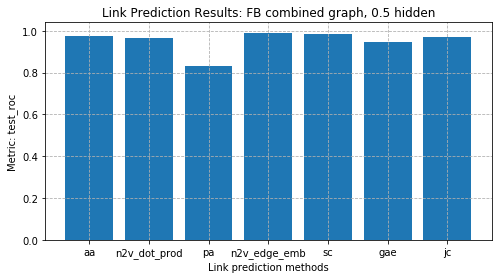

FB Graph: combined
diameter: 8
density: 0.0108199635034
avg_degree: 43.6910126269
num_edges: 88234
num_nodes: 4039
avg_clustering_coef: 0.60554671862
num_connected_components: 1
transitivity: 0.519174277543


In [136]:
# Display bar plot + network statistics
bar_plot('combined', 0.5, 'test_roc')
display_fb_network_statistics('combined')

## 3. Plot ROC Curves

In [145]:
# Plot ROC curve given graph_name, frac_hidden, and link prediction method (e.g. aa, for adamic-adar)
def show_roc_curve(graph_name, frac_hidden, method):
    results_dict = fb_results['fb-{}-{}-hidden'.format(graph_name, frac_hidden)]
    roc_curve = results_dict[method]['test_roc_curve']
    test_roc = results_dict[method]['test_roc']
    fpr, tpr, _ = roc_curve
        
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % test_roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve:\nFB {} graph, {} hidden, {}'.format(graph_name, frac_hidden, method))
    plt.legend(loc="lower right")
    plt.show()

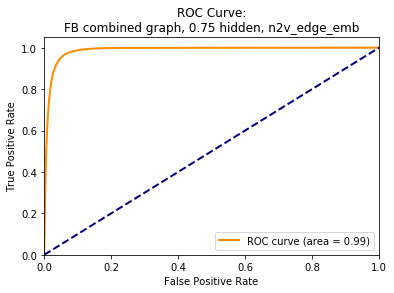

In [146]:
# Try it out!
show_roc_curve('combined', 0.75, 'n2v_edge_emb')